# zerotogbms-project

Use the "Run" button to execute the code.

In [106]:
!pip install jovian --upgrade --quiet

In [107]:
import jovian

In [108]:
# Execute this to save new versions of the notebook
jovian.commit(project="zerotogbms-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

In [109]:
!pip install numpy pandas matplotlib seaborn plotly opendatasets jovian --quiet

## Download and Explore the Data
The dataset is downloaded from kaggle using opendataset library.

In [110]:
pip install opendatasets --upgrade

Note: you may need to restart the kernel to use updated packages.


In [111]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/analystanand/employee-attrition'
od.download(dataset_url)

Skipping, found downloaded files in "./employee-attrition" (use force=True to force download)


In [112]:
import os
data_dir = 'employee-attrition'
os.listdir(data_dir)

['test.csv', 'train.csv']

In [113]:
import pandas as pd
train_csv_path = data_dir + '/train.csv'
attrition_train_data = pd.read_csv(train_csv_path)

In [114]:
attrition_train_data.head()

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Attrition
0,3.8,5.3,3,167,3,0,0,sales,low,1
1,8.0,8.6,6,272,6,0,0,sales,medium,1
2,1.1,8.8,8,282,4,0,0,sales,medium,1
3,3.7,5.2,3,169,3,0,0,sales,low,1
4,4.1,5.0,3,163,3,0,0,sales,low,1


In [115]:
attrition_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25491 entries, 0 to 25490
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      25491 non-null  float64
 1   last_evaluation_rating  25491 non-null  float64
 2   projects_worked_on      25491 non-null  int64  
 3   average_montly_hours    25491 non-null  int64  
 4   time_spend_company      25491 non-null  int64  
 5   Work_accident           25491 non-null  int64  
 6   promotion_last_5years   25491 non-null  int64  
 7   Department              25491 non-null  object 
 8   salary                  25491 non-null  object 
 9   Attrition               25491 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.9+ MB


In [116]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

## Prepare the Dataset for Training
Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1.Identify the input and target column(s) for training the model.
2.Identify numeric and categorical input columns.
3.Impute (fill) missing values in numeric columns.
4.Scale values in numeric columns.
5.Encode categorical data into one-hot vectors.
6.Split the dataset into training and validation sets.

In [117]:
input_cols = ['satisfaction_level','last_evaluation_rating','projects_worked_on','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Department','salary']

In [118]:
target_col = ['Attrition']
inputs_df = attrition_train_data[input_cols].copy()


In [119]:
target = attrition_train_data[target_col]
targets = target.squeeze() 

In [120]:
jovian.commit()


<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

## Identify Numeric and Categorical Data

In [121]:
import numpy as np
numeric_cols = inputs_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include=['object']).columns.tolist()

In [122]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

## Scale Numerical Values

In [123]:
inputs_df[numeric_cols].describe().loc[['min', 'max']]

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
min,0.9,3.6,2.0,96.0,2.0,0.0,0.0
max,10.0,10.0,8.0,320.0,10.0,1.0,1.0


In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

In [125]:
jovian.commit()


<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

## Encode Categorical Columns

In [126]:
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Department    10
salary         3
dtype: int64

In [127]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
len(encoded_cols)

13

In [128]:
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

In [129]:
inputs_df

,satisfaction_level,last_evaluation_rating,projects_worked_on,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,Department_IT,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.318681,0.265625,0.166667,0.316964,0.125,0.0,0.0,sales,low,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.780220,0.781250,0.666667,0.785714,0.500,0.0,0.0,sales,medium,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.021978,0.812500,1.000000,0.830357,0.250,0.0,0.0,sales,medium,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.307692,0.250000,0.166667,0.325893,0.125,0.0,0.0,sales,low,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.351648,0.218750,0.166667,0.299107,0.125,0.0,0.0,sales,low,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25486,0.340659,0.328125,0.000000,0.245536,0.125,0.0,0.0,support,low,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25487,0.307692,0.187500,0.000000,0.285714,0.125,0.0,0.0,support,low,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25488,0.307692,0.265625,0.000000,0.209821,0.125,0.0,0.0,support,low,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
25489,0.021978,0.937500,0.666667,0.821429,0.250,0.0,0.0,support,low,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [130]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

## Training and Validation Set

In [131]:
from sklearn.model_selection import train_test_split

In [132]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs_df[numeric_cols + encoded_cols], 
                                                                        targets, 
                                                                        test_size=0.25, 
                                                                        random_state=42)

In [133]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

## Train a Linear Classification Model and prediction

In [134]:
from sklearn.linear_model import RidgeClassifier
model = RidgeClassifier(alpha=1.0)
model.fit(train_inputs, train_targets)

RidgeClassifier()

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
train_preds = model.predict(train_inputs)
train_preds
train_rmse = mean_squared_error(train_targets, train_preds,squared=False)
print('The RMSE loss for the training set is {}.'.format(train_rmse))

The RMSE loss for the training set is 0.47154628083369815.


In [137]:
val_preds = model.predict(val_inputs)
val_preds

array([0, 0, 0, ..., 0, 0, 0])

In [138]:
val_rmse = mean_squared_error(val_targets, val_preds,squared=False)

In [139]:
print('The RMSE loss for the validation set is  {}.'.format(val_rmse))

The RMSE loss for the validation set is  0.4622922305061132.


## Making Predictions of model trained using Ridge Classification

In [140]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    X_input = input_df[numeric_cols + encoded_cols]
    return model.predict(X_input)[0]

In [141]:
sample_input = {'satisfaction_level': 7.2,'last_evaluation_rating': 8.7,'projects_worked_on': 6,'average_montly_hours': 233,'time_spend_company': 5,'Work_accident': 0,'promotion_last_5years': 0,'Department': 'sales','salary': 'low'}   

In [165]:
predicted_attrition = predict_input(sample_input)
print('The predicted attrition of the employee is {}'.format(predicted_attrition))


The predicted attrition of the employee is 0


### Saving the model_Ridge Classification

In [143]:
import joblib
employee_attrition_predictor = {
    'model': model,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [144]:
joblib.dump(employee_attrition_predictor, 'employee_attrition_predictor.joblib')

['employee_attrition_predictor.joblib']

In [145]:
jovian.commit(outputs=['employee_attrition_predictor.joblib'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Uploading additional outputs...
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

## Training the model using Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
# Create the model
rf1 = RandomForestClassifier(n_jobs=-1, random_state=42)
# Fit the model
rf1.fit(train_inputs, train_targets)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [147]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

## Predictions using the random forest Classifier.

In [148]:
rf1_train_preds = rf1.predict(train_inputs)
rf1_train_rmse =  mean_squared_error(train_targets, rf1_train_preds,squared=False)
rf1_val_preds = rf1.predict(val_inputs)
rf1_val_rmse = mean_squared_error(val_targets, rf1_val_preds,squared=False)

In [149]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 0.0, Validation RMSE: 0.09702947151772791


## Hyper parameter tuning for Random Forest Classifier.

In [150]:
def test_params(**params):
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

In [151]:
test_params(n_estimators=20, max_depth=20)

(0.03687783741993571, 0.10329576042644498)

In [152]:
import matplotlib.pyplot as plt
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

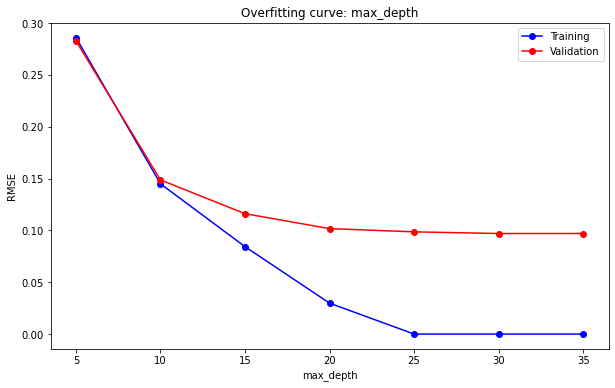

In [153]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

In [154]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

In [155]:
rf2 = RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=40,
                               max_features=0.5,
                               max_depth=30, 
                               )

In [156]:
rf2.fit(train_inputs, train_targets)

RandomForestClassifier(max_depth=30, max_features=0.5, n_estimators=40,
                       n_jobs=-1, random_state=42)

In [157]:
rf2_train_preds = rf2.predict(train_inputs)
rf2_train_rmse = mean_squared_error(train_targets, rf2_train_preds,squared=False)
rf2_val_preds = rf2.predict(val_inputs)
rf2_val_rmse = mean_squared_error(val_targets, rf2_val_preds,squared=False)
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 0.010228071826600217, Validation RMSE: 0.09539860794709001


### Feature Importance.

In [158]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [159]:
rf2_importance_df

,feature,importance
0,satisfaction_level,0.409163
4,time_spend_company,0.208581
1,last_evaluation_rating,0.132062
3,average_montly_hours,0.121896
2,projects_worked_on,0.097143
18,salary_low,0.004061
16,Department_technical,0.003855
5,Work_accident,0.003490
19,salary_medium,0.003203
14,Department_sales,0.002935


In [177]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "borji-nipun/zerotogbms-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/borji-nipun/zerotogbms-project


'https://jovian.ai/borji-nipun/zerotogbms-project'

### Hyperparameter Tuning of Ridge classification model.

In [161]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier

In [162]:
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

In [163]:
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator= model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(train_inputs, train_targets)

In [164]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    

Best: 0.777435 using {'alpha': 0.1}
0.777435 (0.007867) with: {'alpha': 0.1}
0.777435 (0.007867) with: {'alpha': 0.2}
0.777418 (0.007862) with: {'alpha': 0.3}
0.777418 (0.007862) with: {'alpha': 0.4}
0.777435 (0.007854) with: {'alpha': 0.5}
0.777435 (0.007854) with: {'alpha': 0.6}
0.777435 (0.007854) with: {'alpha': 0.7}
0.777435 (0.007854) with: {'alpha': 0.8}
0.777435 (0.007854) with: {'alpha': 0.9}
0.777435 (0.007854) with: {'alpha': 1.0}


In [168]:
model1 = RidgeClassifier(alpha=0.1)
model1.fit(train_inputs, train_targets)

RidgeClassifier(alpha=0.1)

Thus for for alpha value of 0.1, the Ridge classification model gives the best prediction.

### Making Predictions on the Test Set

In [166]:
test_df = pd.read_csv('employee-attrition/test.csv')

reapply all the preprocessing steps.

In [169]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [170]:
test_inputs = test_df[numeric_cols + encoded_cols]

In [171]:
test_preds = model1.predict(test_inputs)

In [172]:
test_preds

array([0, 1, 1, ..., 0, 1, 1])

###  Model Weights

In [175]:
weights =  model1.coef_.flatten().tolist()
weights_df = pd.DataFrame({
    'columns': train_inputs.columns,
    'weight': weights
}).sort_values('weight', ascending=False)

In [176]:
weights_df

,columns,weight
4,time_spend_company,0.600281
3,average_montly_hours,0.278064
18,salary_low,0.184933
10,Department_hr,0.093514
1,last_evaluation_rating,0.087752
15,Department_support,0.054684
9,Department_accounting,0.051594
16,Department_technical,0.037963
19,salary_medium,0.023761
14,Department_sales,0.006180


# Make a Submission

In [ ]:
jovian.submit('zerotogbms-project')

<IPython.core.display.Javascript object>